---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Yousr Ashraf Hejy"

# Part 1 PCA

In [ ]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


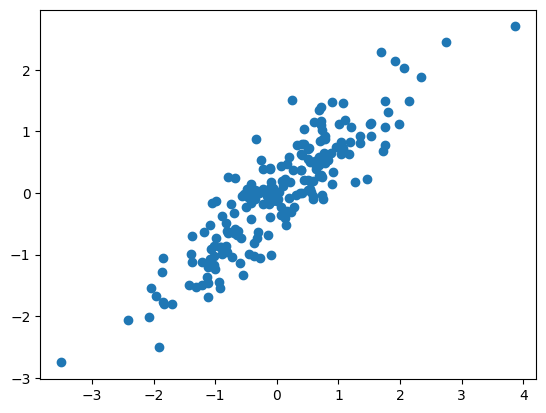

In [ ]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
X.shape

(200, 2)

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
# #### YOUR FUNCTION

def pca(X):
    # standardize the data
    standardized_X = X - np.mean(X, axis=0)  
    # Get the covariance matrix
    covarience_matrix = np.cov(standardized_X, rowvar = False)  
    # calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenvalue, eigenvectors = np.linalg.eig(covarience_matrix)
    
    # sort the eigenvectors and eigenvalues in descending order of eigenvalue
    sorted_indices = eigenvalue.argsort()[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalue = eigenvalue[sorted_indices]
    
    # transform the data using the sorted eigenvectors
    X_transformed = np.dot(sorted_eigenvectors.T, standardized_X.T).T
    # X_transformed = sorted_eigenvalue.T.dot(standardized_X.T).T
    # X_transformed = standardized_X.dot(sorted_eigenvalue).T
    
    return sorted_eigenvectors, sorted_eigenvalue, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


In [ ]:
# X_transformed

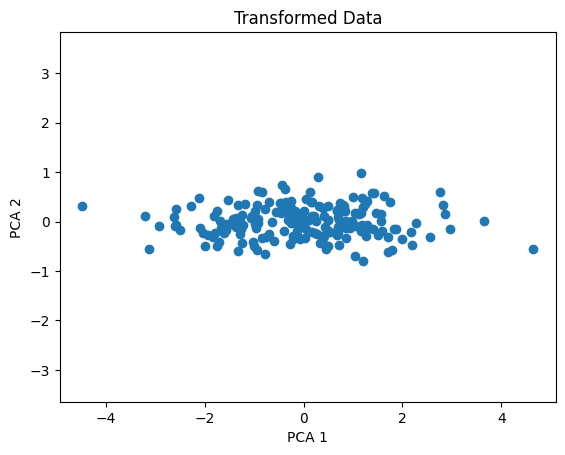

In [ ]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title('Transformed Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.axis('equal');
plt.show()


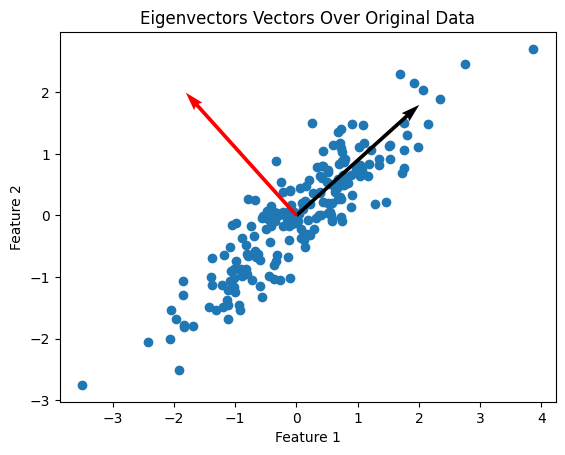

In [ ]:
### Plot eigenvectors over ORIGINAL data
plt.scatter(X[:, 0], X[:, 1])
plt.quiver(0, 0, sorted_eigenvectors[0, 0], sorted_eigenvectors[1, 0], color='black', scale=3)
plt.quiver(0, 0, sorted_eigenvectors[0, 1], sorted_eigenvectors[1, 1], color='red', scale=3)
plt.title("Eigenvectors Vectors Over Original Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
from sklearn.decomposition import PCA

n_pcomponents = 2
pca = PCA(n_components = n_pcomponents)

# Fit the PCA model to the data and transform the data
X_transformed_sk = pca.fit_transform(X)

# Print the PCA eigenvalues
print("PCA eigenvalues:", pca.explained_variance_)

PCA eigenvalues: [1.82927343 0.10246373]


## Question 4
- Appl sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [ ]:
n_pcomponents = 1
# Create a PCA with 1 principal components
pca = PCA(n_components = n_pcomponents)

# Fit the PCA model with  1 component only to the data 
X_transformed_sk1 = pca.fit_transform(X)

print("Transformed data shape:", X_transformed_sk1.shape)

Transformed data shape: (200, 1)


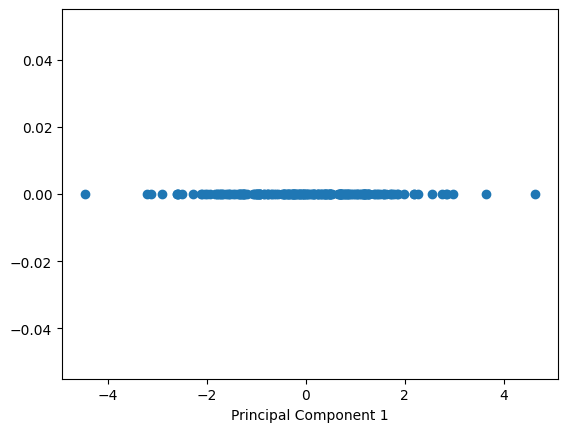

In [ ]:
# Plot the transformed data
X_zeros = np.zeros_like(X_transformed_sk1[:, 0])
plt.scatter(X_transformed_sk1[:, 0], X_zeros)
plt.xlabel('Principal Component 1')
plt.show()

# Part 2 SVM

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.figure(figsize=(30,30))    
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

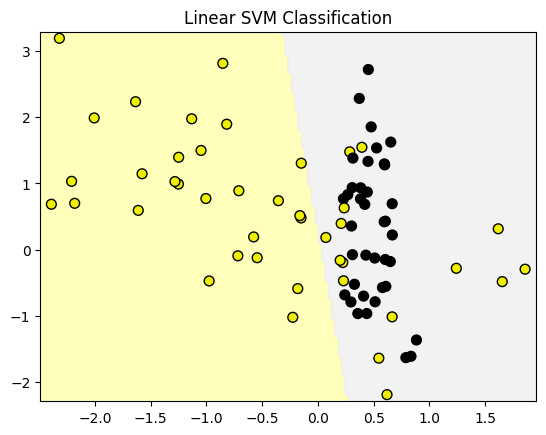

In [ ]:
from sklearn.svm import SVC

# training
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Plotting manually
# sns.scatterplot(x = X_train[:, 0], y = X_train[:, 1], hue=y_train);
# plt.xlabel('Feature 1')
# plt.xlabel('Feature 2')

# # Plotting the classification regoin 
# # the classification line parameters
# w = svc_linear.coef_[0]          
# b = svc_linear.intercept_[0]    
# x_points = np.linspace(-1, 1)    
# y_points = -(w[0] / w[1]) * x_points - b / w[1] 
# plt.plot(x_points, y_points, c='b');

# Plotting using the given function
plot_class_regions_for_classifier(svc_linear, X_train, y_train, X_test=None, y_test=None, title="Linear SVM Classification", target_names = None, plot_decision_regions = True)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

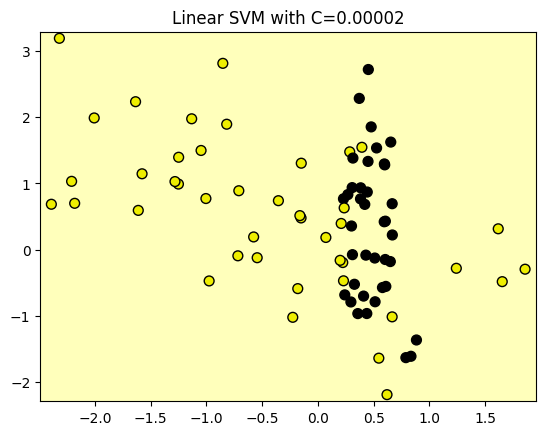

In [ ]:
svc_min_c = SVC(kernel='linear', C=0.00002)
svc_min_c.fit(X_train, y_train)

# Plotting 
plot_class_regions_for_classifier(svc_min_c, X_train, y_train, X_test=None, y_test=None, title="Linear SVM with C=0.00002", target_names = None, plot_decision_regions = True)

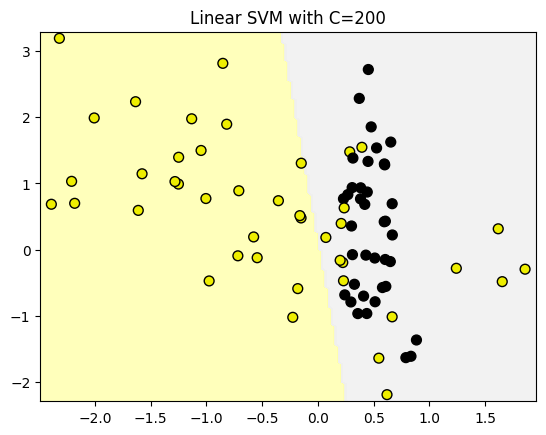

In [ ]:
svc_max_c = SVC(kernel='linear', C=200)
svc_max_c.fit(X_train, y_train)


# Plotting 
plot_class_regions_for_classifier(svc_max_c, X_train, y_train, X_test=None, y_test=None, title="Linear SVM with C=200", target_names = None, plot_decision_regions = True)

### C parameter in SVM is Penalty parameter that identify how much you want to avoid misclassifying each training example or the degree of optimization.

* for greater values of C, the missclassification of SVM optimizer decrease until misclassification of any single point is rare.
* As values of C increase, the optimization will choose a smaller-margin hyperplane so points are classified correctly.
* As values of C decrease, the optimizer will look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

The SVC with c= 0.00002 couldnt generate decision boundries to split between the data and large margin of the data is missclassified

The SVC with c= 200 generate decision boundries to split between the data, where it split the data with less error than the previos c that couldnt split the data and the missclassifed point decreased sharply

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVC

fruits = pd.read_table('/content/Yousr Hejy - fruit_data_with_colors.txt', sep='        ')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

<ipython-input-55-5ab78aaf3540>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fruits = pd.read_table('/content/Yousr Hejy - fruit_data_with_colors.txt', sep='        ')


In [ ]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
 fruits.columns          

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [ ]:
# X = fruits.drop('fruit_label', axis=1)
# y = fruits['fruit_label']
# X.head(2)

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [ ]:
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
# X_fruits.head(2)
# X_fruits[['height', 'width']]
# X_fruits.columns

In [ ]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fruits[['height', 'width']], y_fruits, test_size=0.2, random_state=42)

In [ ]:
# svc_fruits = SVC(kernel='linear', random_state=42, C=10)
svc_fruits = LinearSVC(random_state=42, C=10)
svc_fruits.fit(X_train_f, y_train_f)
svc_fruits.score(X_train_f, y_train_f)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6382978723404256

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

Q.5.1:
4 SVM model has been trained as there is 4 Intercept.

In [ ]:
# Print the model's coefficients
print('SVM Coefficients:\n', svc_fruits.coef_)
# Print the model's intercept
print('\nSVM Intercept:', svc_fruits.intercept_)

SVM Coefficients:
 [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]

SVM Intercept: [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


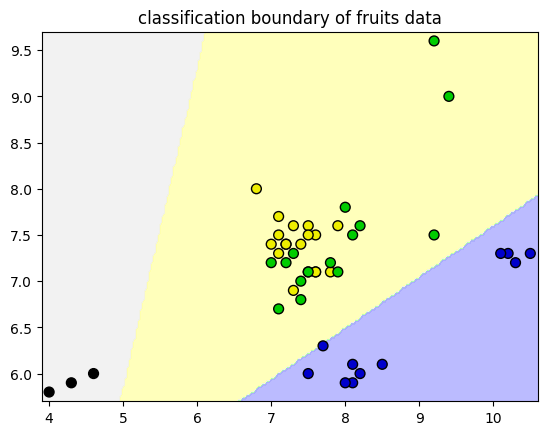

<Figure size 3000x3000 with 0 Axes>

In [ ]:
plot_class_regions_for_classifier(svc_fruits, np.array(X_train_f), np.array(y_train_f), X_test=None, y_test=None, 
                                  title="classification boundary of fruits data", target_names = None, 
                                  plot_decision_regions = True)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

svc_fruits_clf = OneVsRestClassifier(SVC(kernel='linear').fit(np.array(X_train_f), np.array(y_train_f)))

In [ ]:
# # Plotting 
# plot_class_regions_for_classifier(svc_fruits_clf, np.array(X_train_f), np.array(y_train_f), X_test=None, y_test=None, title="classification boundary of fruits data", target_names = None, plot_decision_regions = True)

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [ ]:
######################## splitting ############################
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

######################## Grid search ##########################
# create the grid parameters
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
# Create a svc classifier
svc_c = SVC()
grid_search_c = GridSearchCV(svc_c, parameters)
# Fit the grid search object to the data
grid_search_c.fit(X_train_c, y_train_c)

# Print the best hyperparameters and its corresponding accuracy score
print(f"Best hyperparameters: {grid_search_c.best_params_}")
print(f"Accuracy score: {round(grid_search_c.best_score_*100, 2)}")

Best hyperparameters: {'C': 10, 'kernel': 'poly'}
Accuracy score: 91.65


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [ ]:
svc_c = SVC(kernel='poly', C=10)
svc_c.fit(X_train_c, y_train_c)

print('Accuracy of SVC on training set: {:.2f}'.format(svc_c.score(X_train_c, y_train_c)))
print('Accuracy of SVC on test set: {:.2f}'.format(svc_c.score(X_test_c, y_test_c)))

Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.93


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

### The Fisrt way for scaling:

In [ ]:
normalization = [MinMaxScaler, StandardScaler]

for i in normalization:
  scaler = i()
  X_train_scaler = scaler.fit_transform(X_train_c)
  X_test_scaler = scaler.transform(X_test_c)
  svc_classifier = SVC(kernel='poly', C=10)
  svc_classifier.fit(X_train_scaler, y_train_c)
  svm_acc_train = round(svc_classifier.score(X_train_scaler, y_train_c), 2)
  svm_acc_test = round(svc_classifier.score(X_test_scaler, y_test_c), 2)
  print(svm_acc_train, svm_acc_test)

0.99 0.96
0.97 0.96


### The Second way for scaling using pipline:

In [ ]:
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train_p = pipeline.fit_transform(X_train_c)
X_test_p = pipeline.transform(X_test_c)

model = SVC(kernel='poly', C=10)
model.fit(X_train_p, y_train_c)

svm_train = round(model.score(X_train_p, y_train_c), 2)
svm_test = round(model.score(X_test_p, y_test_c), 2)

print(svm_train, svm_test)

0.97 0.96


In [ ]:
print('Accuracy of SVC on training set: {:.2f}'.format(model.score(X_train_p, y_train_c)))
print('Accuracy of SVC on test set: {:.2f}'.format(model.score(X_test_p, y_test_c)))

Accuracy of SVC on training set: 0.97
Accuracy of SVC on test set: 0.96
